# Lab 8: Variance of Sample Means and Correlation

In this lab we will learn about [the variance of sample means](https://inferentialthinking.com/chapters/14/5/Variability_of_the_Sample_Mean.html) as well as ways to understand and quantify [the association between two variables](https://inferentialthinking.com/chapters/15/1/Correlation.html).

In [ ]:
name = ...

In [20]:
## import statements
# These lines load the tests. 
from gofer.ok import check
import numpy as np
from datascience import *
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# Fix for datascience plots
import collections as collections
import collections.abc as abc
collections.Iterable = abc.Iterable

## 1. How Faithful is Old Faithful? 

(Note: clever title comes from [here](http://web.pdx.edu/~jfreder/M212/oldfaithful.pdf).)

Old Faithful is a geyser in Yellowstone National Park in the central United States.  It's famous for erupting on a fairly regular schedule.  You can see a video below.

In [ ]:
# For the curious: this is how to display a YouTube video in a
# Jupyter notebook.  The argument to YouTubeVideo is the part
# of the URL (called a "query parameter") that identifies the
# video.  For example, the full URL for this video is:
#   https://www.youtube.com/watch?v=wE8NDuzt8eg
from IPython.display import YouTubeVideo
YouTubeVideo("wE8NDuzt8eg")

Some of Old Faithful's eruptions last longer than others.  When it has a long eruption, there's generally a longer wait until the next eruption.

If you visit Yellowstone, you might want to predict when the next eruption will happen, so you can see the rest of the park and come to see the geyser when it erupts.  To predict one variable from another, the first step is to understand the association between them.

The dataset has one row for each observed eruption.  It includes the following columns:
- **duration**: Eruption duration, in minutes
- **wait**: Time between this eruption and the next, also in minutes

Run the next cell to load the dataset.

In [ ]:
faithful = Table.read_table("faithful-new.csv")
faithful

**Question 1**
<br/>
Make a scatter plot of the data.  It's conventional to put the column we will try to predict on the vertical axis and the other column on the horizontal axis. The predictor column is the independent or often labeled x variable.

In [ ]:
predictor_col = ... # This is the label as a string of the predictor column or independent x variable

#### To plot a scatter plot need arrays froom columns of data
See example below to examine the Philadelphia Phillies winning percentage, `PCT`, as a function of year, `YEAR`.

In [ ]:
# EXAMPLE DATA AND SCATTER PLOT
exampledata = Table().with_columns( \
     'YEAR', np.arange(2013,2023,1), \
     'PCT', make_array(.451,.451,.389,.438,.407,.494,.500,.467,.506,.537))
exampledata

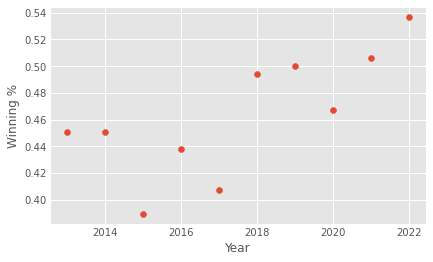

In [19]:
plt.scatter(exampledata.column('YEAR'),exampledata.column('PCT')) # need to use each column as an array to plot
plt.xlabel("Year")
plt.ylabel("Winning %")
plt.show()

#### Now try to plot the `faithful` data

In [ ]:
faithful.stats() # Helpful check on data, not neccessary in this case

In [ ]:
# Now plot
plt.scatter(faithful.column(predictor_col),faithful.column('wait'))
plt.xlabel("duration")
plt.ylabel("wait")
plt.savefig("scatter.png") # Helpful way to save figure
plt.show()

##### Now try yourself, plot the reverse `wait`  versus  `duration`

In [ ]:
plt.scatter(... , ...)
plt.savefig("scatter_reverse.png")
plt.show()

In [ ]:
check('tests/q1.py')

**Question 2**

Look at the scatter plot. Are eruption duration and waiting time roughly linearly related?  Is the relationship positive, as we claimed earlier?  You may want to consult [the textbook chapter 15](https://inferentialthinking.com/chapters/15/1/Correlation.html#the-correlation-coefficient) for the definition of "linearly related."

<font color='red'>*Write your answer here, replacing this text.*

Standard units makes the analysis of the relationship between duration and wait more straightforward. 
First, we'll plot the data in standard units.  Recall that, if `nums` is an array of numbers, then

    (nums - np.mean(nums)) / np.std(nums)

is an array of those numbers in standard units.

**Question 3**
<br/>
Compute the mean and standard deviation of the eruption durations and waiting times.  **Then** create a table called `faithful_standard` containing the eruption durations and waiting times in standard units.  (The columns should be named `"duration (standard units)"` and `"wait (standard units)"`.

In [ ]:
duration_mean = ...
duration_std = ...
wait_mean = ...
wait_std = ...

faithful_standard = Table().with_columns(
    "duration (standard units)", ...,
    "wait (standard units)", ...)
faithful_standard

In [ ]:
check('tests/q3.py')

**Question 4**
<br/>
Plot the data again, but this time in standard units.

In [ ]:
# Review from above how plot a scatter plot
plt.scatter(faithful_standard.column(...), ...)
plt.show()

You'll notice that this plot looks exactly the same as the last one!  The data really are different, but the axes are scaled differently.  (The method `scatter` scales the axes so the data fill up the available space.)  So it's important to read the ticks on the axes.

**Question 5**

Among the following numbers, which would you guess is closest to the correlation between eruption duration and waiting time in this dataset?

* -1
* 0
* 1

Assign your answer to `closest_correlation`.

In [ ]:
closest_correlation = ...

In [ ]:
check('tests/q5.py')

**Question 6**
<br/>
Compute the correlation `r`.  *Hint:* Use `faithful_standard`.  Section [15.1.2](https://inferentialthinking.com/chapters/15/1/Correlation.html#calculating-r) explains how to do this.

In [ ]:
r = ...
r

In [ ]:
check('tests/q6.py')

### The regression line
Recall that the correlation is the slope of the regression line when the data are put in standard units.

The next cell plots the regression line in standard units:

$$\text{waiting time (standard units)} = r \times \text{eruption duration (standard units)}.$$

Then, it plots the original data again, for comparison.

In [ ]:
def plot_data_and_line(dataset, x, y, point_0, point_1):
    """Makes a scatter plot of the dataset, along with a line passing through two points. x and y are strings containing column labels"""
    xdata = dataset.column(x)
    ydata = dataset.column(y)
    plt.scatter(xdata, ydata, label="data")
    xs, ys = zip(point_0, point_1)
    plt.plot(xs, ys, label="regression line")
    plt.legend(bbox_to_anchor=(1.5,.8))

plot_data_and_line(faithful_standard, 
                   "duration (standard units)", 
                   "wait (standard units)", 
                   [-2, -2*r], 
                   [2, 2*r])

How would you take a point in standard units and convert it back to original units?  We'd have to "stretch" its horizontal position by `duration_std` and its vertical position by `wait_std`.

That means the same thing would happen to the slope of the line.

Stretching a line horizontally makes it less steep, so we divide the slope by the stretching factor.  Stretching a line vertically makes it more steep, so we multiply the slope by the stretching factor.

#### Question 7
What is the slope of the regression line in original units?

(If the "stretching" explanation is unintuitive, consult section [15.2.5](https://inferentialthinking.com/chapters/15/2/Regression_Line.html#the-equation-of-the-regression-line) in the textbook.)

In [ ]:
slope = ...
slope

We know that the regression line passes through the point `(duration_mean, wait_mean)`.  You might recall from high-school algebra that the equation for the line is therefore:

$$\text{waiting time} - \verb|wait_mean| = \texttt{slope} \times (\text{eruption duration} - \verb|duration_mean|)$$

After rearranging that equation slightly, the intercept turns out to be:

In [ ]:
intercept = slope*(-duration_mean) + wait_mean
intercept

In [ ]:
check('tests/q7.py')

## 2. Variability of the Sample Mean

By the Central Limit Theorem, the probability distribution of the mean of a large random sample is roughly normal. The bell curve is centered at the population mean. Some of the sample means are higher, and some lower, but the deviations from the population mean are roughly symmetric on either side, as we have seen repeatedly. Formally, probability theory shows that the sample mean is an unbiased estimate of the population mean.

In our simulations, we also noticed that the means of larger samples tend to be more tightly clustered around the population mean than means of smaller samples. In this section, we will quantify the variability of the sample mean and develop a relation between the variability and the sample size.

Let's take a look at the salaries of employees of the City of San Francisco in 2014. The mean salary reported by the city government was about $75463.92.

In [ ]:
salaries = Table.read_table('sf_salaries_2014.csv').select("salary")
salaries

In [ ]:
salary_mean = np.mean(salaries.column('salary'))
salary_mean

In [ ]:
salaries.hist('salary', bins=np.arange(0, 300000+10000*2, 10000))
plt.scatter(salary_mean, 0, marker='^', color='red', s=1000);

**Question 8**
<br/>
Clearly, the population does not follow a normal distribution. Keep that in mind as we progress through these exercises.

Let's take random samples and look at the probability distribution of the sample mean. As usual, we will use simulation to get an empirical approximation to this distribution.

We will define a function `simulate_sample_mean` to do this, because we are going to vary the sample size later. The arguments are the name of the table, the label of the column containing the variable, the sample size, and the number of simulations.

Complete the function `simulate_sample_mean`.

In [ ]:
"""Empirical distribution of random sample means"""

def simulate_sample_mean(table, label, sample_size, repetitions):
    
    means = []

    for i in np.arange(repetitions):
        new_sample = ...
        new_sample_mean = ...
        ...

    sample_means = Table().with_column('Sample Means', means)
    
    # Display empirical histogram and print all relevant quantities – don't change this!
    fig, ax = plt.subplots()
    ax.hist(means, bins=20)
    plt.xlabel('Sample Means')
    plt.title('Sample Size ' + str(sample_size))
    
    textstr = '\n'.join((
    r'$\mathrm{Sample  Size}=%.2f$' % (sample_size, ),
    r'$\mathrm{Population  Mean}=%.2f$' % (np.mean(table.column(label)), ),
    r'$\mathrm{Average Of Sample Means}=%.2f$' % (np.mean(means), ), 
    r'$\mathrm{Population SD}=%.2f$' % (np.std(table.column(label)), ),
    r'$\mathrm{SD Of Sample Means}=%.2f$' % (np.std(means), )))

    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    # place a text box in upper left in axes coords
    ax.text(0.95, 0.75, textstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    
    return means

In [ ]:
check('tests/q8.py')

**Question 9**
<br/>
In the following cell, we will create a sample of size 100 from the salaries table and graph it using our new `simulate_sample_mean` function.

In [ ]:
small_sample_size = simulate_sample_mean(salaries, 'salary', 100, 10000) 
plt.xlim(50000, 100000)

In the following two cells, simulate the mean of a random sample of 400 salaries and 625 salaries, respectively. In each case, perform 10,000 repetitions of each of these processes. Don't worry about the `plots.xlim` line – it just makes sure that all of the plots have the same x-axis. 

In [ ]:
...
plt.xlim(50000, 100000)

In [ ]:
...
plt.xlim(50000, 100000)

We can see the Central Limit Theorem in action – the histograms of the sample means are roughly normal, even though the histogram of the salaries themselves is far from normal.

We can also see that each of the three histograms of the sample means is centered very close to the population mean. In each case, the "average of sample means" is very close to the population mean. Both values are provided in the printout above each histogram. As expected, the sample mean is an unbiased estimate of the population mean.

**Question 10**

Below, we'll look at what happens when we take a fixed sample, then bootstrap from it with different numbers of resamples. How does the distribution of the resampled means change?

In [ ]:
simulate_sample_mean(salaries, 'salary', 100, 500)
plt.xlim(50000, 100000)

In [ ]:
simulate_sample_mean(salaries, 'salary', 100, 1000)
plt.xlim(50000, 100000)

In [ ]:
simulate_sample_mean(salaries, 'salary', 100, 5000)
plt.xlim(50000, 100000)

In [ ]:
simulate_sample_mean(salaries, 'salary', 100, 10000)
plt.xlim(50000, 100000)

Assign the variable `bootstrap_sampled_SD` to the integer corresponding to your answer to the following prediction question:

When I increase the number of bootstrap samples that I take, for a fixed sample size, the SD of my sample mean will...

1. Increase
2. Decrease
3. Stay about the same
4. Vary widly

In [ ]:
bootstrap_sampled_SD = ...

In [ ]:
check('tests/q10.py')

What did you notice about the sample means of the four bootstrapped samples above?

**Question 11**
<br/>
Next, let's think about how the relationships between population SD, sample SD, and SD of sample means change with varying sample size. Which of the following is true? Again, assign the variable `pop_vs_sample` to the integer corresponding to your answer. To gain some intuition, you can run the simulation cells below.

1. Sample SD gets smaller with increasing sample size, SD of sample means gets smaller with increasing sample size
2. Sample SD gets larger with increasing sample size, SD of sample means stays the same with increasing sample size
3. Sample SD becomes more consistent with population SD with increasing sample size, SD of sample means gets smaller with increasing sample size
4. Sample SD becomes more consistent with populatoin SD with increasing sample size, SD of smaple means stays the same with increasing sample size

In [ ]:
pop_vs_sample = ...

In [ ]:
check('tests/q11.py')

Let's see what happens: First, we calculate the population SD so that we can compare the SD of each sample to the SD of the population.

In [ ]:
pop_sd = np.std(salaries.column("salary"))
pop_sd

Let's then how a small sample behaves. Run the following cells multiple times to see how the SD of the sample changes from sample to sample. Adjust the bins as necessary.

In [ ]:
sample_10 = salaries.sample(10)
sample_10.hist("salary")
print("Sample SD: ", np.std(sample_10.column("salary")))
means = simulate_sample_mean(sample_10, 'salary', 10, 1000)

In [ ]:
sample_200 = salaries.sample(200)
sample_200.hist("salary")
print("Sample SD: ", np.std(sample_200.column("salary")))
means = simulate_sample_mean(sample_200, 'salary', 200, 1000)

In [ ]:
sample_1000 = salaries.sample(1000)
sample_1000.hist("salary")
print("Sample SD: ", np.std(sample_1000.column("salary")))
means = simulate_sample_mean(sample_1000, 'salary', 1000, 1000)

Let's illustrate this trend. Below, you will see how the average absolute error of SD from the population changes with sample size (N).

In [ ]:
# Don't change this cell, just run it!
sample_n_errors = make_array()
for i in np.arange(10, 200, 10):
    sample_n_errors = np.append(sample_n_errors, np.average([abs(np.std(salaries.sample(i).column("salary"))-pop_sd)
                                                             for d in np.arange(100)]))
Table().with_columns("Average absolute error in SD", sample_n_errors, "N", np.arange(10, 200, 10)).plot("N", "Average absolute error in SD")

You should notice that the distribution of means gets spiker, and that the distribution of the sample increasingly looks like the distribution of the population as we get to larger sample sizes. 

Is there a relationship between the sample size and absolute error in standard deviation? Identify this relationship – if you're having trouble, take a look at this [section](https://inferentialthinking.com/chapters/14/5/Variability_of_the_Sample_Mean.html) in our textbook about the variability of sample means.

## Submission

You're finished with lab 8! In order to successfully submit your assignment, follow these steps...
- **IMPORTANT** Before you do anything, **Save and Checkpoint** from the `File` menu. Please do this first before running the cell below,
- **run all the tests and verify that they all pass** (the next cell has a shortcut for that), 
- **Review the notebook one last time** If you make any changes, please **Save and Checkpoint** again.
- Download as an .html file and/or an .ipynb file and submit on Canvas! 

In [ ]:
# For your convenience, you can run this cell to run all the tests at once!
import glob
from gofer.ok import check
correct = 0
checks = [1,3,5,6,7,8,10,11]
total = len(checks)
for x in checks:
    print('Testing question {}: '.format(str(x)))
    g = check('tests/q{}.py'.format(str(x)))
    if g.grade == 1.0:
        print("Passed")
        correct += 1
    else:
        print('Failed')
        display(g)

print('Grade:  {}'.format(str(correct/total)))